In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.font_manager import FontProperties

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

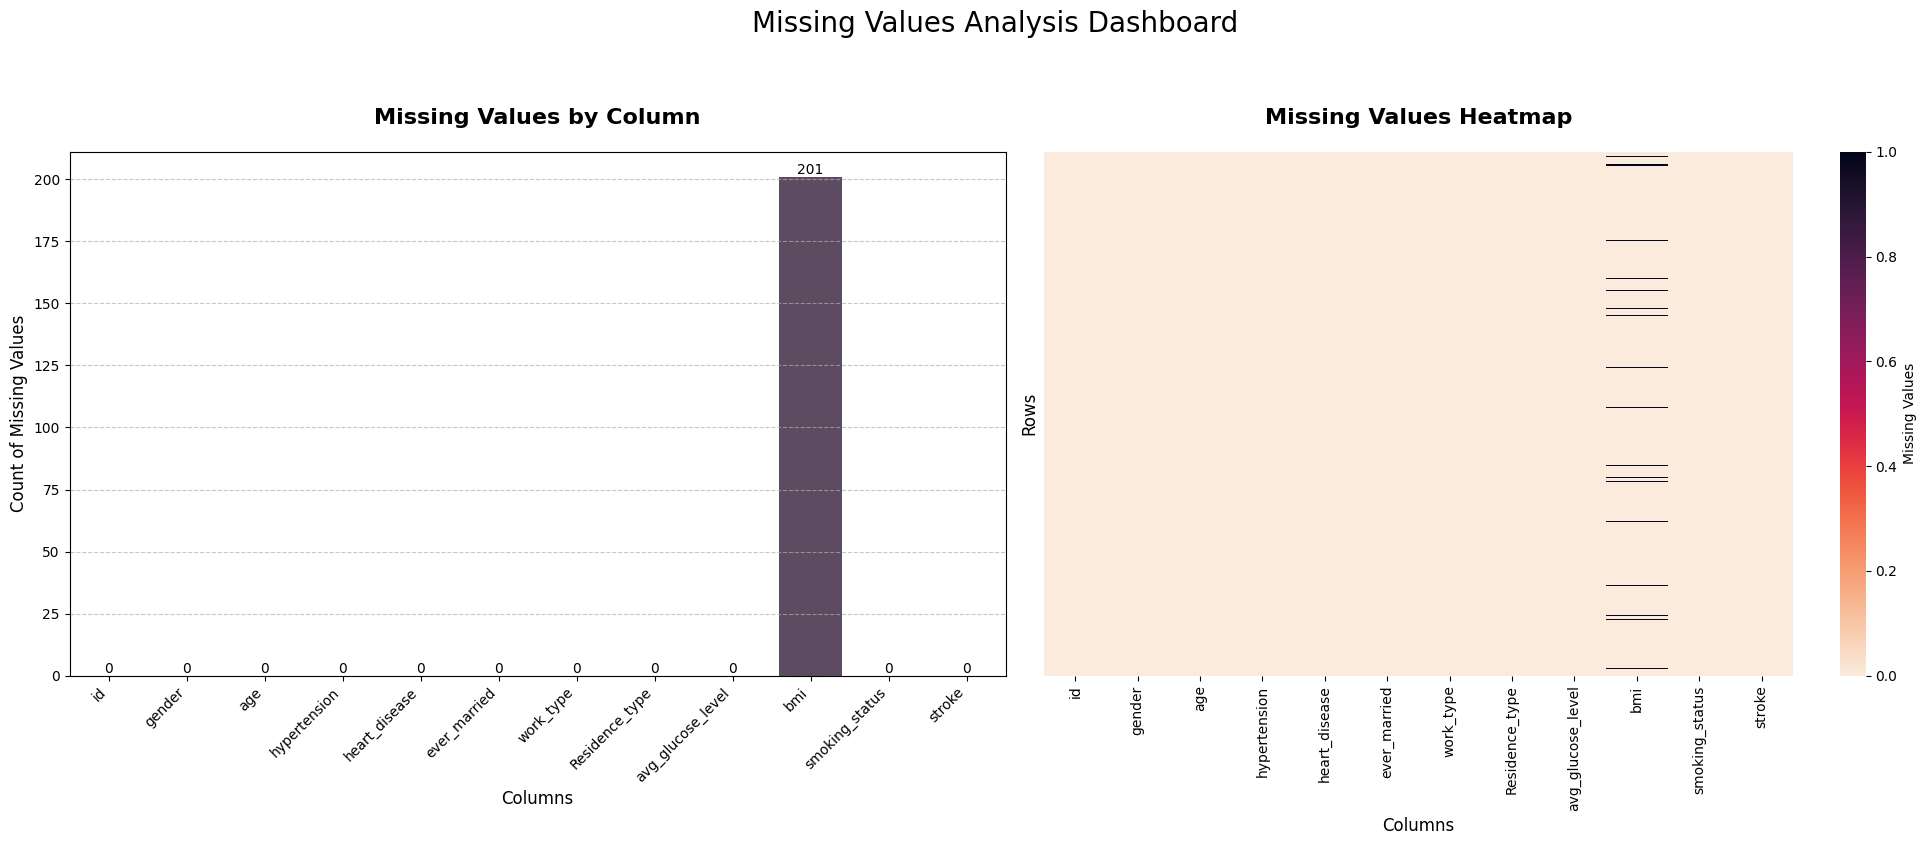

In [6]:
fig = plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
missing_values = df.isnull().sum()
ax = sns.barplot(x=missing_values.index, y=missing_values.values, alpha=0.8, color="#35193e")
plt.title("Missing Values by Column", pad=20, fontsize=16, fontweight="bold")
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(missing_values.values):
    ax.text(i, v, str(v), ha="center", va="bottom")

ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
sns.heatmap(df.isnull(), 
            cmap="rocket_r",
            yticklabels=False,
            cbar_kws={"label": "Missing Values"})
plt.title("Missing Values Heatmap", pad=20, fontsize=16, fontweight="bold")
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)

plt.suptitle("Missing Values Analysis Dashboard", fontsize=20, y=1.05)
plt.tight_layout()

plt.show()

In [7]:
df.columns = df.columns.str.title()
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'Bmi',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [8]:
df.rename(columns = {"Bmi": "BMI", "Id": "ID"}, inplace = True)
df.columns

Index(['ID', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [9]:
df.dtypes

ID                     int64
Gender                object
Age                  float64
Hypertension           int64
Heart_Disease          int64
Ever_Married          object
Work_Type             object
Residence_Type        object
Avg_Glucose_Level    float64
BMI                  float64
Smoking_Status        object
Stroke                 int64
dtype: object

In [10]:
def categorize_age(age):
    if age >= 0 and age <= 1:
        return "Infant"
    elif age > 1 and age <= 3:
        return "Toddler"
    elif age > 3 and age <= 6:
        return "Preschoooler"
    elif age > 6 and age <= 12:
        return "School Age"
    elif age > 12 and age < 20:
        return "Teenager"
    elif age >= 20 and age <= 24:
        return "Adolescense"
    elif age > 24 and age <= 39:
        return "Adult"
    elif age > 39 and age <= 59:
        return "Middle Aged"
    else:
        return "Senior"

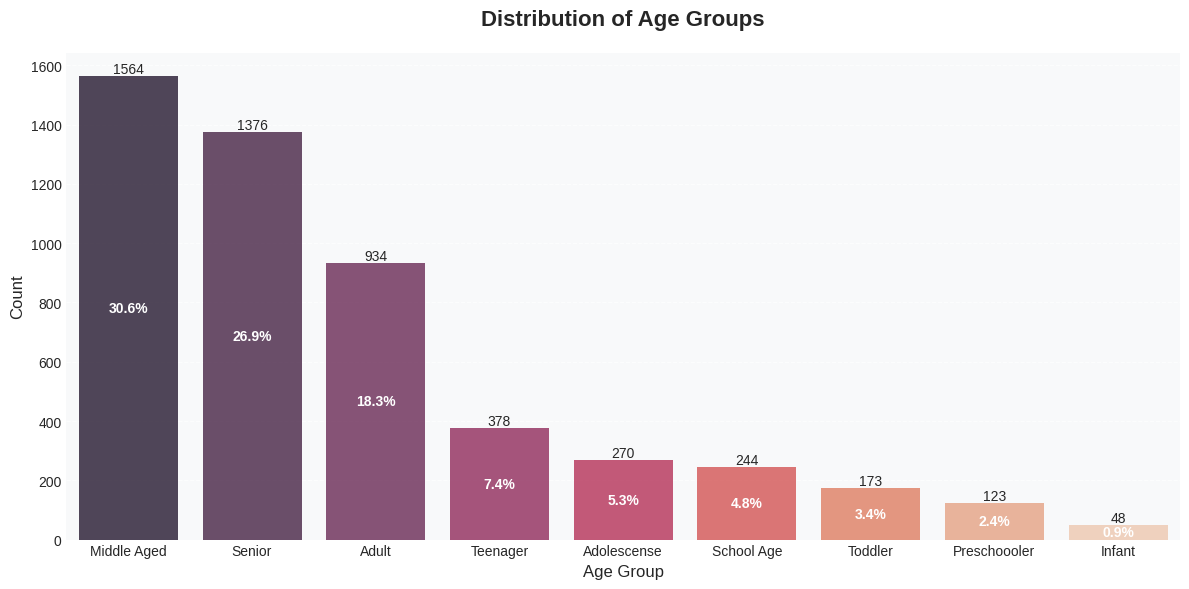

In [11]:
df["Age_Group"] = df["Age"].apply(categorize_age)

plt.style.use("seaborn-v0_8-darkgrid")

plt.figure(figsize=(12, 6))

age_counts = df["Age_Group"].value_counts()
ax = sns.barplot(x=age_counts.index, 
                 y=age_counts.values,
                 palette="rocket",
                 alpha=0.8)

plt.title("Distribution of Age Groups", pad=20, fontsize=16, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)

for i, v in enumerate(age_counts.values):
    ax.text(i, v, str(v), ha="center", va="bottom", fontsize=10)

ax.grid(axis="y", linestyle="--", alpha=0.7)


plt.xticks(rotation=0)


ax.set_facecolor("#f8f9fa")


total = age_counts.sum()
for i, v in enumerate(age_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f"{percentage:.1f}%", 
            ha="center", 
            va="center",
            color="white",
            fontweight="bold")

plt.tight_layout()

plt.show()

In [12]:
df.duplicated().sum()

0

In [13]:
df = df[df["Gender"] != "Other"]

In [14]:
df.Gender.value_counts()

Gender
Female    2994
Male      2115
Name: count, dtype: int64

In [15]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
Age_Group              0
dtype: int64

In [16]:
df[df["BMI"] >= 45]

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Age_Group
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1,Middle Aged
66,17004,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1,Senior
79,42117,Male,43.0,0,0,Yes,Self-employed,Urban,143.43,45.9,Unknown,1,Middle Aged
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1,Middle Aged
163,20426,Female,78.0,1,0,No,Private,Urban,203.87,45.7,never smoked,1,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,63656,Female,18.0,0,0,No,Private,Urban,101.95,46.0,formerly smoked,0,Teenager
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0,Middle Aged
5015,50140,Female,44.0,0,0,Yes,Govt_job,Rural,133.24,45.0,smokes,0,Middle Aged
5057,38349,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0,Middle Aged


In [17]:
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1

x = Q1 - 3 * IQR
y = Q3 + 3 * IQR

outliers = df[(df["BMI"] < x) | (df["BMI"] > y)]
outliers

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Age_Group
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0,Middle Aged
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0,Middle Aged
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,Adolescense
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0,Middle Aged
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,Teenager
2764,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0,Adolescense
4188,70670,Female,27.0,0,0,Yes,Private,Rural,57.96,64.4,never smoked,0,Adult
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0,Adult


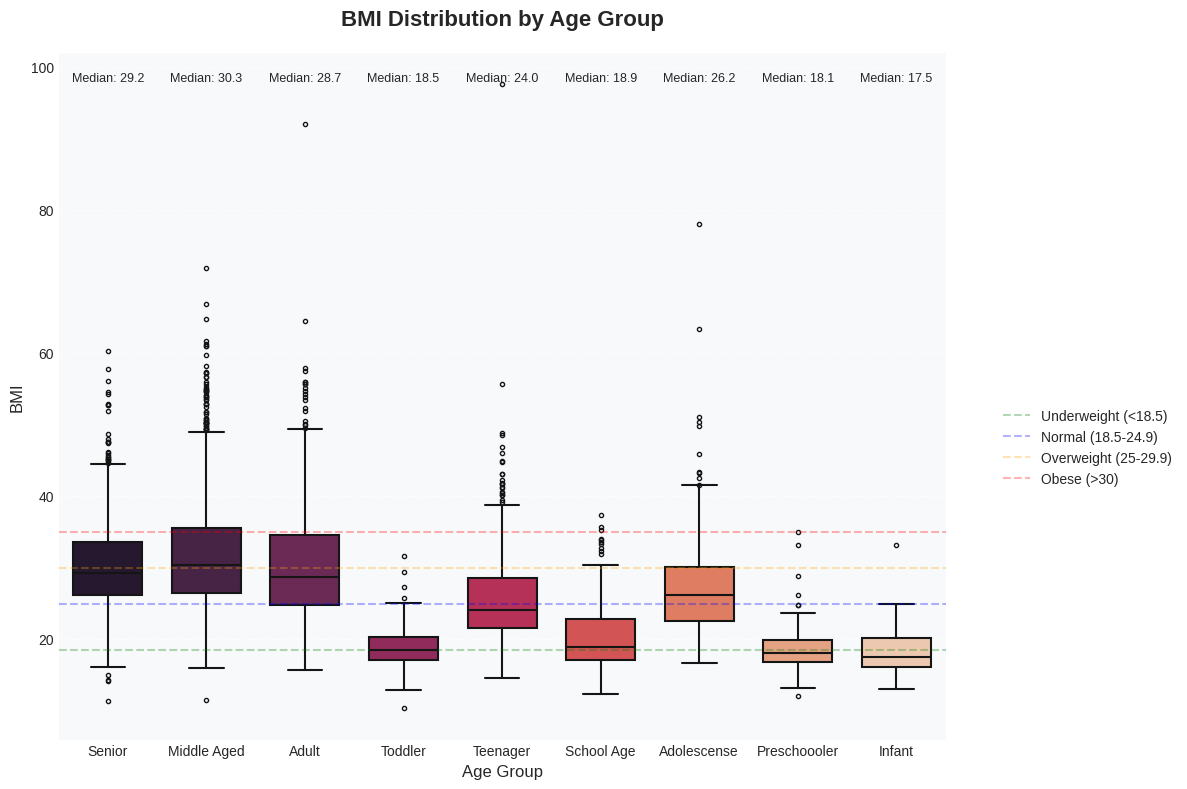

In [18]:
plt.style.use("seaborn-v0_8-darkgrid")

plt.figure(figsize=(12, 8))


ax = sns.boxplot(data=df,
                 x="Age_Group",
                 y="BMI",
                 palette="rocket",
                 width=0.7,
                 fliersize=3,
                 linewidth=1.5)


plt.title("BMI Distribution by Age Group", pad=20, fontsize=16, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("BMI", fontsize=12)

ax.set_facecolor("#f8f9fa")

ax.grid(axis="y", linestyle="--", alpha=0.7)


for i in range(len(df["Age_Group"].unique())):
    age_group = df["Age_Group"].unique()[i]
    median = df[df["Age_Group"] == age_group]["BMI"].median()
    ax.text(i, df["BMI"].max(), f"Median: {median:.1f}", 
            ha="center", va="bottom", fontsize=9)

plt.axhline(y=18.5, color="green", linestyle="--", alpha=0.3, label="Underweight (<18.5)")
plt.axhline(y=24.9, color="blue", linestyle="--", alpha=0.3, label="Normal (18.5-24.9)")
plt.axhline(y=29.9, color="orange", linestyle="--", alpha=0.3, label="Overweight (25-29.9)")
plt.axhline(y=34.9, color="red", linestyle="--", alpha=0.3, label="Obese (>30)")

plt.legend(bbox_to_anchor=(1.05, 0.5), loc="upper left")

plt.tight_layout()

plt.show()


In [19]:
bmi_avg_value = df.groupby(["Age_Group", "Gender"])["BMI"].median().reset_index()

In [20]:
bmi_avg_value

,Age_Group,Gender,BMI
0,Adolescense,Female,26.50
1,Adolescense,Male,25.75
2,Adult,Female,28.10
3,Adult,Male,29.90
4,Infant,Female,17.35
5,Infant,Male,18.30
6,Middle Aged,Female,29.80
7,Middle Aged,Male,30.80
8,Preschoooler,Female,17.95
9,Preschoooler,Male,18.10


In [21]:
df["BMI"] = df["BMI"].fillna(df.groupby(["Gender", "Age_Group"])["BMI"].transform("median"))

In [22]:
df["BMI"].isnull().sum()

0

In [23]:
def categorize_BMI(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Normal Weight"
    elif 24.9 < bmi <= 29.9:
        return "Overweight"
    elif 34.9 < bmi <= 40:
        return "Severely Obese"
    else:
        return "Extreme Obese"

In [24]:
df["BMI_Group"] = df["BMI"].apply(categorize_BMI)

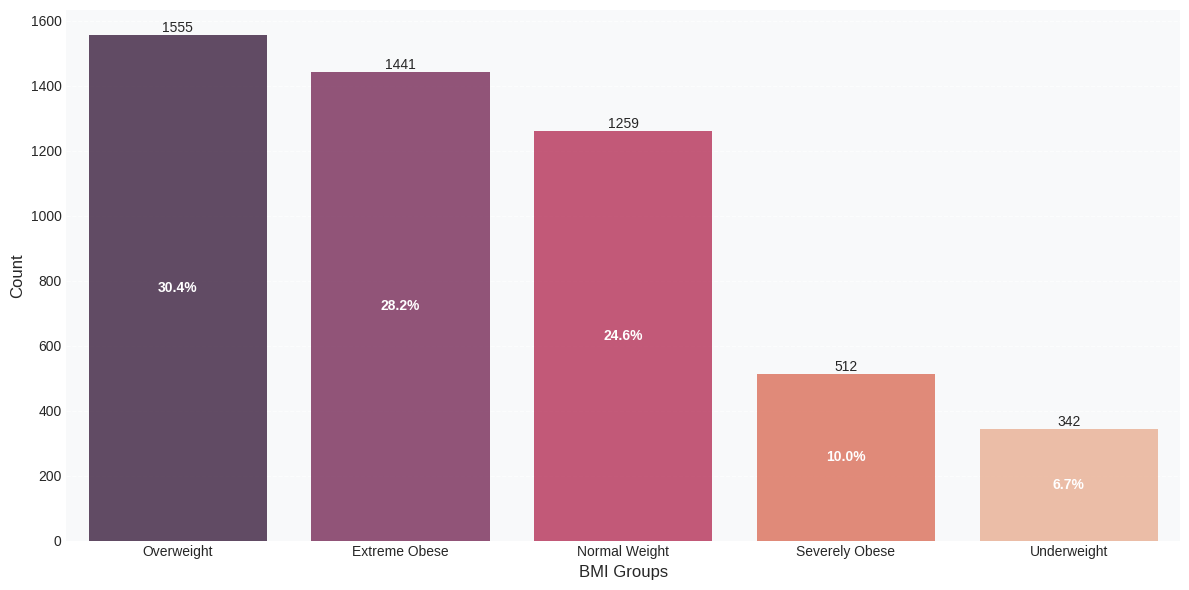

In [25]:
plt.style.use("seaborn-v0_8-darkgrid")

plt.figure(figsize = (12, 6))

bmi_counts = df["BMI_Group"].value_counts()
ax = sns.barplot(x=bmi_counts.index,
                 y=bmi_counts.values,
                 palette="rocket",
                 alpha=0.8)

plt.xlabel("BMI Groups", fontsize=12)
plt.ylabel("Count", fontsize=12)

for i, v in enumerate(bmi_counts.values):
    ax.text(i, v, str(v), ha="center", va="bottom", fontsize=10)

ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.xticks(rotation=0)
ax.set_facecolor("#f8f9fa")

total = bmi_counts.sum()
for i, v in enumerate(bmi_counts.values):
    percentage = (v / total) * 100
    ax.text(i, v / 2, f"{percentage:.1f}%",
            ha="center",
            va="center",
            color="white",
            fontweight="bold")

plt.tight_layout()
plt.show()

In [26]:
df["Glucose_Level_Group"] = pd.cut(df["Avg_Glucose_Level"], bins = [0,90,160,230,500], labels = ["Low", "Normal", "High", "Very High"])


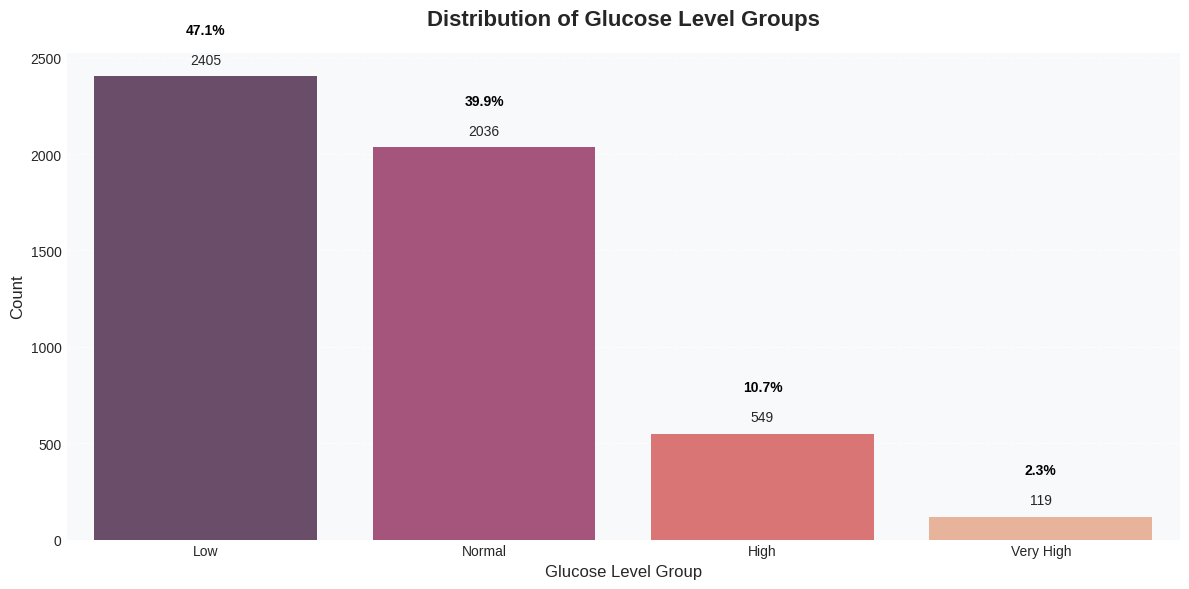

In [27]:
plt.style.use("seaborn-v0_8-darkgrid")

plt.figure(figsize=(12, 6))

glc_counts = df["Glucose_Level_Group"].value_counts()

ax = sns.barplot(x=glc_counts.index, 
                 y=glc_counts.values,
                 palette="rocket",
                 alpha=0.8)

plt.title("Distribution of Glucose Level Groups", pad=20, fontsize=16, fontweight="bold")
plt.xlabel("Glucose Level Group", fontsize=12)
plt.ylabel("Count", fontsize=12)

for i, v in enumerate(glc_counts.values):
    ax.text(i, v + 0.02 * glc_counts.max(), str(v), ha="center", va="bottom", fontsize=10)

ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.xticks(rotation=0)

ax.set_facecolor("#f8f9fa")

total = glc_counts.sum()
for i, v in enumerate(glc_counts.values):
    percentage = (v/total) * 100

    ax.text(i, v + 0.1 * glc_counts.max(), f"{percentage:.1f}%", 
            ha="center", 
            va="center",
            color="black",
            fontweight="bold")

plt.tight_layout()

plt.show()

In [28]:
stroke_positive = df[df["Stroke"] == 1]
stroke_negative = df[df["Stroke"] == 0]

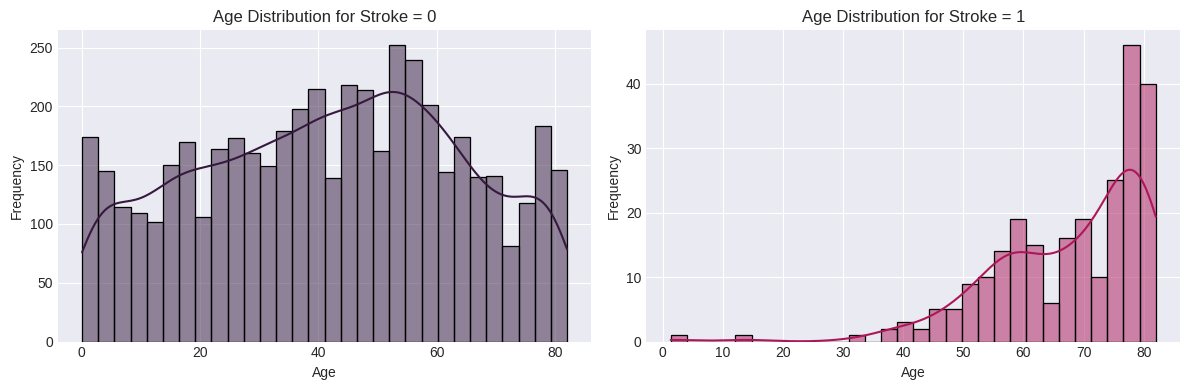

In [29]:
plt.style.use("seaborn-v0_8-darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=stroke_negative, x="Age", bins=30, kde=True, color="#35193e", ax=axes[0])
axes[0].set_title("Age Distribution for Stroke = 0")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

sns.histplot(data=stroke_positive, x="Age", bins=30, kde=True, color="#ad1759", ax=axes[1])
axes[1].set_title("Age Distribution for Stroke = 1")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [30]:
stroke_negative = df[df["Stroke"] == 0]
stroke_positive = df[df["Stroke"] == 1]
correlation_positive = stroke_positive[["BMI", "Avg_Glucose_Level"]].corr()
correlation_negative = stroke_negative[["BMI", "Avg_Glucose_Level"]].corr()

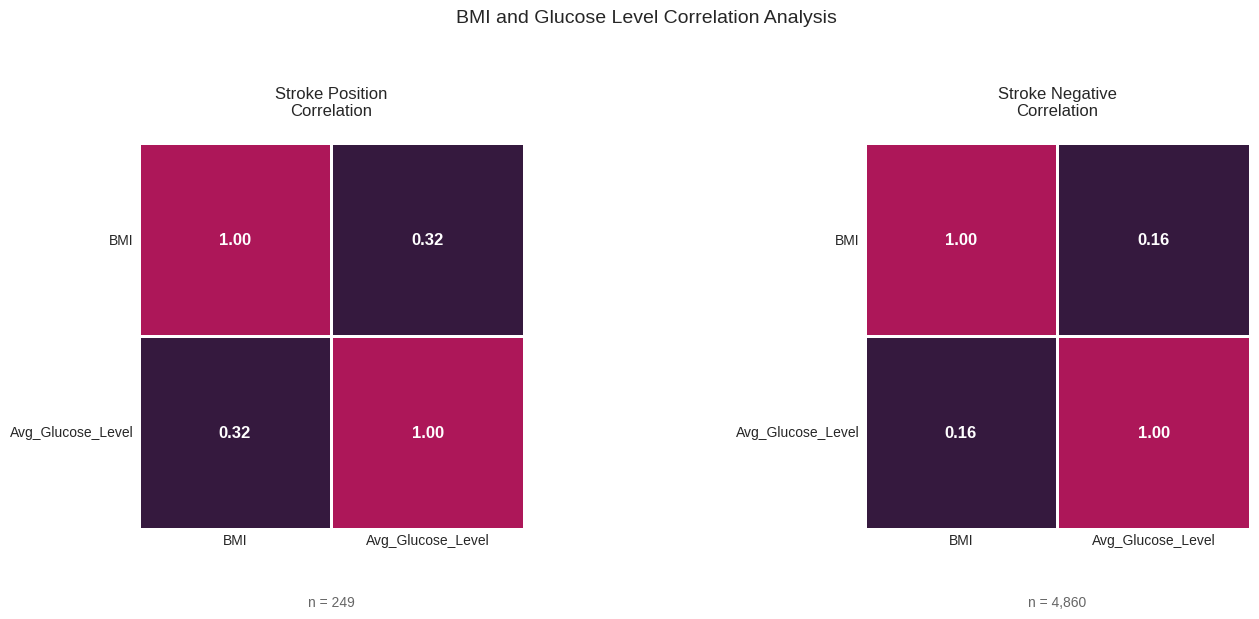

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

dark_purple_rose_red_cmap = sns.color_palette(["#35193e", "#ad1759"], as_cmap=True)

sns.heatmap(correlation_positive,
            annot=True,
            cmap=dark_purple_rose_red_cmap,
            fmt=".2f",
            square=True,
            cbar=False,
            ax=ax1,
            annot_kws={"size": 12, "weight": "bold"},
            linewidth=2,
            linecolor="white")

ax1.set_title("Stroke Position\nCorrelation",
              pad=20,
              fontsize=12,
              fontweight="light",
              family="sans-serif")

sns.heatmap(correlation_negative,
            annot=True,
            cmap=dark_purple_rose_red_cmap,
            fmt=".2f",
            square=True,
            cbar=False,
            ax=ax2,
            annot_kws={"size": 12, "weight": "bold"},
            linewidth=2,
            linecolor="white")

ax2.set_title("Stroke Negative\nCorrelation", 
              pad=20, 
              fontsize=12, 
              fontweight="light",
              family="sans-serif")

# Add minimal sample size information
for ax, data, title in [(ax1, stroke_positive, "Positive"), 
                        (ax2, stroke_negative, "Negative")]:
    ax.text(0.5, -0.2, 
            f"n = {len(data):,}", 
            transform=ax.transAxes, 
            fontsize=10,
            ha="center",
            color="#666666")
    
    # Clean up axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add subtle main title
plt.suptitle("BMI and Glucose Level Correlation Analysis", 
             fontsize=14, 
             fontweight="light", 
             y=1.05,
             family="sans-serif")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

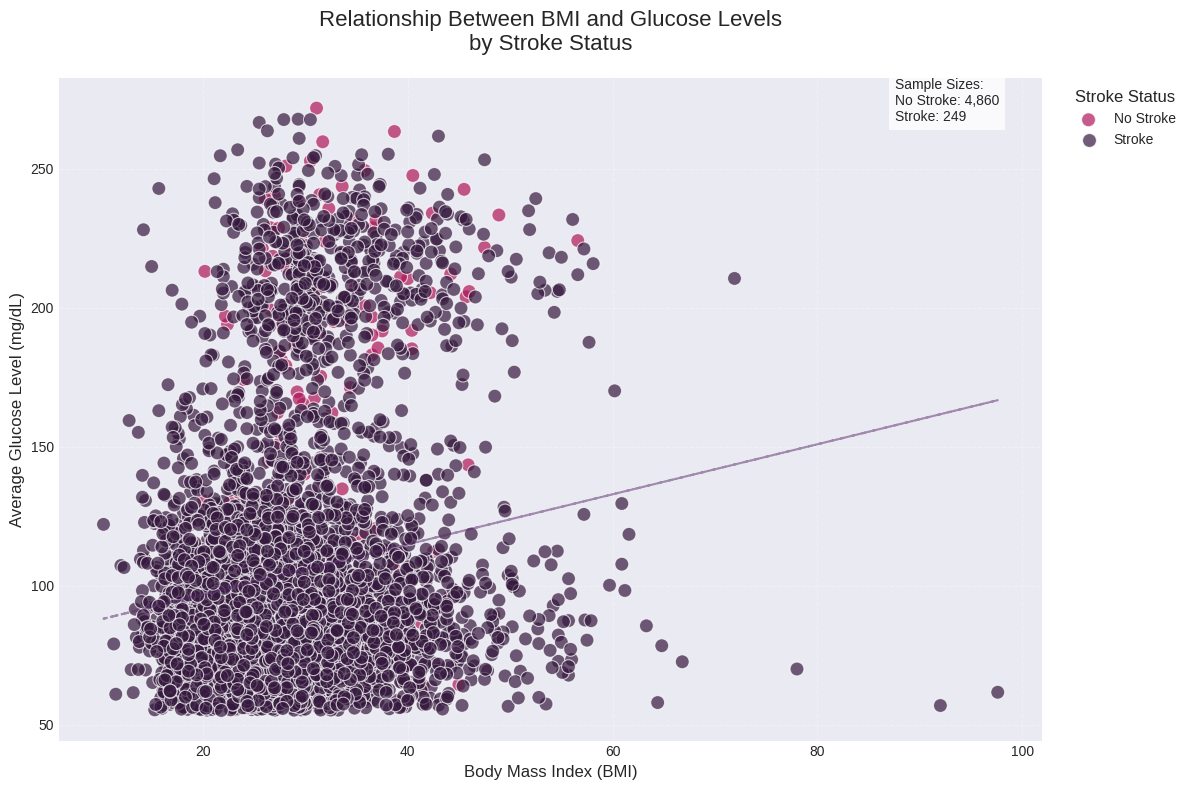

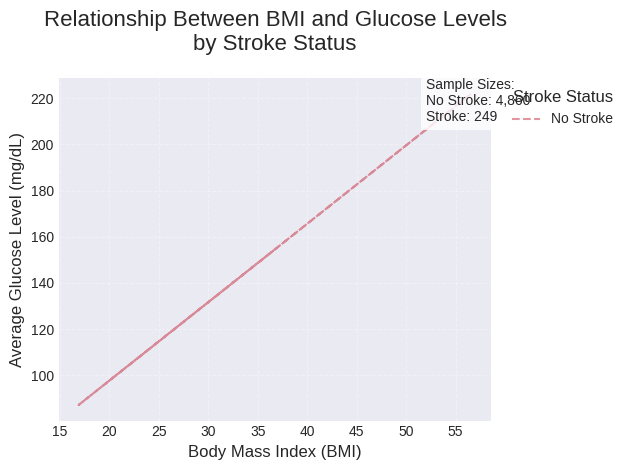

In [32]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=df,
    x="BMI",
    y="Avg_Glucose_Level",
    hue="Stroke",
    alpha=0.7,
    s=100,
    palette={0: "#35193e", 1: "#ad1759"},
    legend="brief"
)

for stroke_status in [0, 1]:
    mask = df["Stroke"] == stroke_status
    x = df[mask]["BMI"]
    y = df[mask]["Avg_Glucose_Level"]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),
             linestyle="--",
             alpha=0.5,
             color="#5A2A6C" if stroke_status == 0 else "#C72C41")

    plt.title("Relationship Between BMI and Glucose Levels\nby Stroke Status",
              fontsize=16,
              pad=20,
              fontweight="light",
              family="sans-serif")

    plt.xlabel("Body Mass Index (BMI)",
               fontsize=12,
               fontweight="light")
    plt.ylabel("Average Glucose Level (mg/dL)",
               fontsize=12,
               fontweight="light")
    legend = plt.legend(title="Stroke Status",
                        labels=["No Stroke", "Stroke"],
                        title_fontsize=12,
                        fontsize=10,
                        bbox_to_anchor=(1.02, 1),
                        loc="upper left")
    legend.get_frame().set_alpha(0.9)
    legend.get_frame().set_edgecolor("white")

    plt.grid(True, linestyle="--", alpha=0.3)

    stroke_counts = df["Stroke"].value_counts()
    plt.text(0.85, 1,
             f"Sample Sizes:\nNo Stroke: {stroke_counts[0]:,}\nStroke: {stroke_counts[1]:,}",
             transform=plt.gca().transAxes,
             fontsize=10,
             verticalalignment="top",
             bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))

    scatter.spines["top"].set_visible(False)
    scatter.spines["bottom"].set_visible(False)

    plt.tight_layout()
    plt.show()

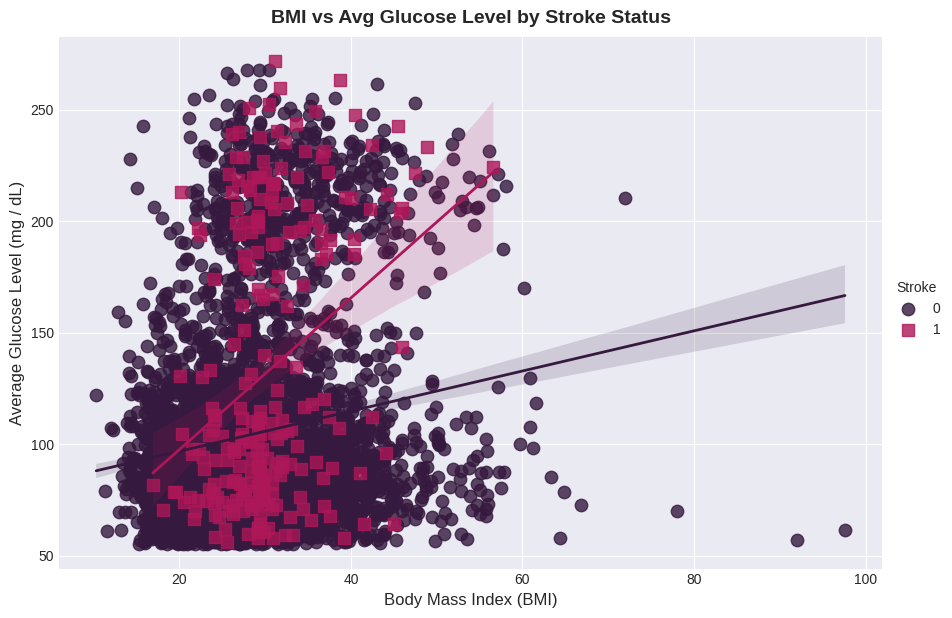

In [33]:
palette = {0: "#35193e", 1: "#ad1759"}

g = sns.lmplot(
    data=df,
    x="BMI",
    y="Avg_Glucose_Level",
    hue="Stroke",
    height=6,
    aspect=1.5,
    markers=["o", "s"],
    palette=palette,
    scatter_kws={"s": 80, "alpha": 0.8},
    line_kws={"linewidth": 2}
)

g.set_axis_labels("Body Mass Index (BMI)", "Average Glucose Level (mg / dL)", fontsize=12)
g.fig.suptitle("BMI vs Avg Glucose Level by Stroke Status", y=1.02, fontsize=14, weight="bold")

plt.show()

In [34]:
df["Smoking_Status"].value_counts()

Smoking_Status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

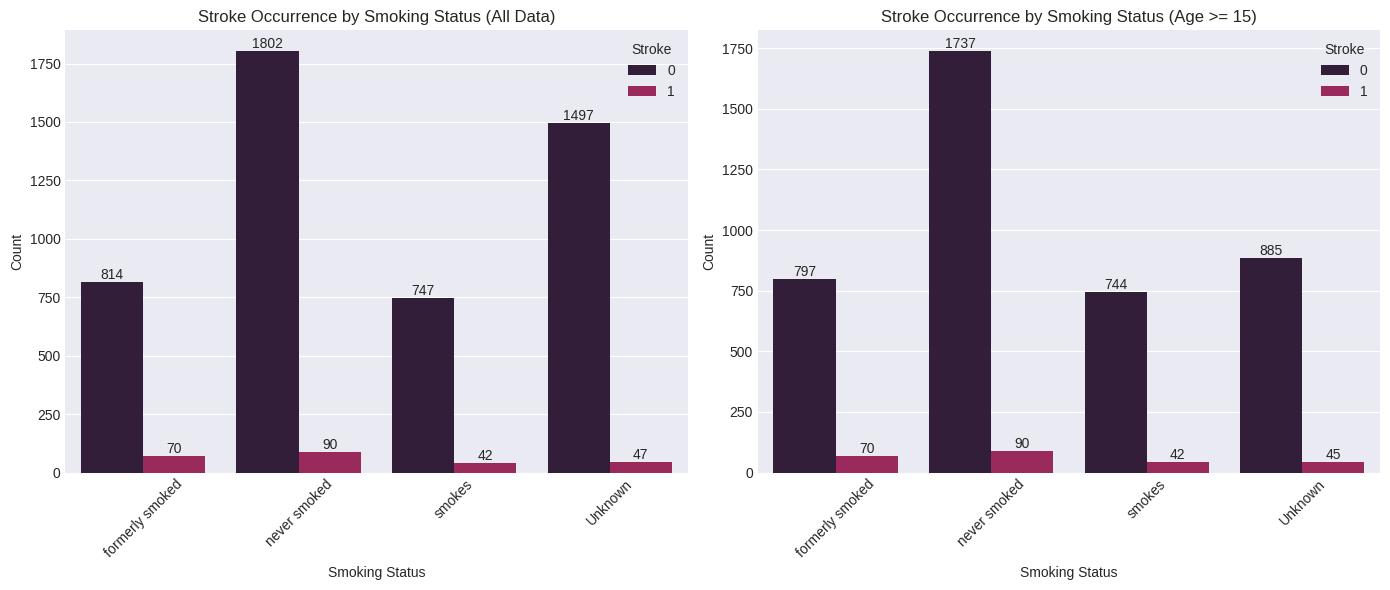

In [35]:
df_filtered = df[df["Age"] >= 15]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = {0: "#35193e", 1: "#ad1759"} 

sns.countplot(data=df, x="Smoking_Status", hue="Stroke", ax=axes[0], palette=palette)
axes[0].set_title("Stroke Occurrence by Smoking Status (All Data)")
axes[0].set_xlabel("Smoking Status")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%d")

sns.countplot(data=df_filtered, x="Smoking_Status", hue="Stroke", ax=axes[1], palette=palette)
axes[1].set_title("Stroke Occurrence by Smoking Status (Age >= 15)")
axes[1].set_xlabel("Smoking Status")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=45)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%d")

plt.tight_layout()

plt.show()

In [36]:
grouped = df.groupby("Heart_Disease")["Stroke"].mean().reset_index()

In [37]:
grouped

,Heart_Disease,Stroke
0,0,0.041796
1,1,0.170290


In [38]:
df_grouped = df.groupby(["Heart_Disease", "Stroke"]).size().unstack(fill_value=0)

In [39]:
df_grouped_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

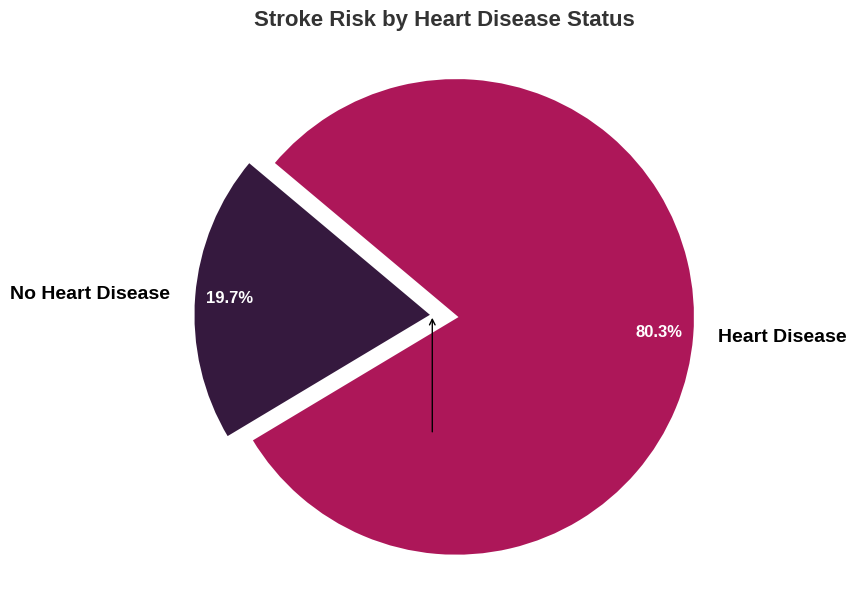

In [40]:
labels = ["No Heart Disease", "Heart Disease"]
sizes = df_grouped_percent[1]
colors = ["#35193e", "#ad1759"]  
explode = [0, 0.1]  

fig, ax = plt.subplots(figsize=(8, 6)) 
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",  
    startangle=140,  
    colors=colors,
    explode=explode,
    pctdistance=0.85,  
    wedgeprops={"edgecolor": "white", "linewidth": 2, "linestyle": "solid"}  
)

plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=14, weight="bold", color="black")  
ax.set_title("Stroke Risk by Heart Disease Status", fontsize=16, weight="bold", color="#333333", pad=20)  

ax.annotate("", xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor="black", edgecolor="black", arrowstyle="->", lw=1))

ax.axis("equal")

plt.tight_layout()
plt.show()

In [41]:
grouped = df.groupby("Work_Type")[["Hypertension", "Stroke"]].mean()

In [42]:
grouped

,Hypertension,Stroke
Work_Type,,
Govt_job,0.111111,0.050228
Never_worked,0.000000,0.000000
Private,0.096101,0.050958
Self-employed,0.175824,0.079365
children,0.000000,0.002911


In [43]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline

In [44]:
stress_analysis = round(df.groupby("Work_Type")[["Hypertension", "Stroke"]].mean() * 100,2)
stress_analysis = stress_analysis.rename(columns={"Hypertension": "Hypertension Rate (%)", "Stroke": "Stroke Rate (%)"})

fig = px.imshow(stress_analysis.T,
                labels={"x": "Work Type", "y": "Indicator"},
                x=stress_analysis.index,
                y=stress_analysis.columns,
                color_continuous_scale=["#35193e", "#ad1759"],
                color_continuous_midpoint=50,
                title="High Blood Pressure and Stroke Rates by Job Type",
                text_auto=True,
                height=600,
                width=800)

fig.update_layout(
    title_font_size=24,
    title_font_family="Arial, sans-serif",
    title_font_color="black",
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    coloraxis_colorbar=dict(title="Oran (%)", tickvals=[0, 50, 100], ticktext=["0%", "50%", "100%"])
)

fig.show(renderer="iframe_connected")

In [45]:
df.Work_Type.value_counts()

Work_Type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

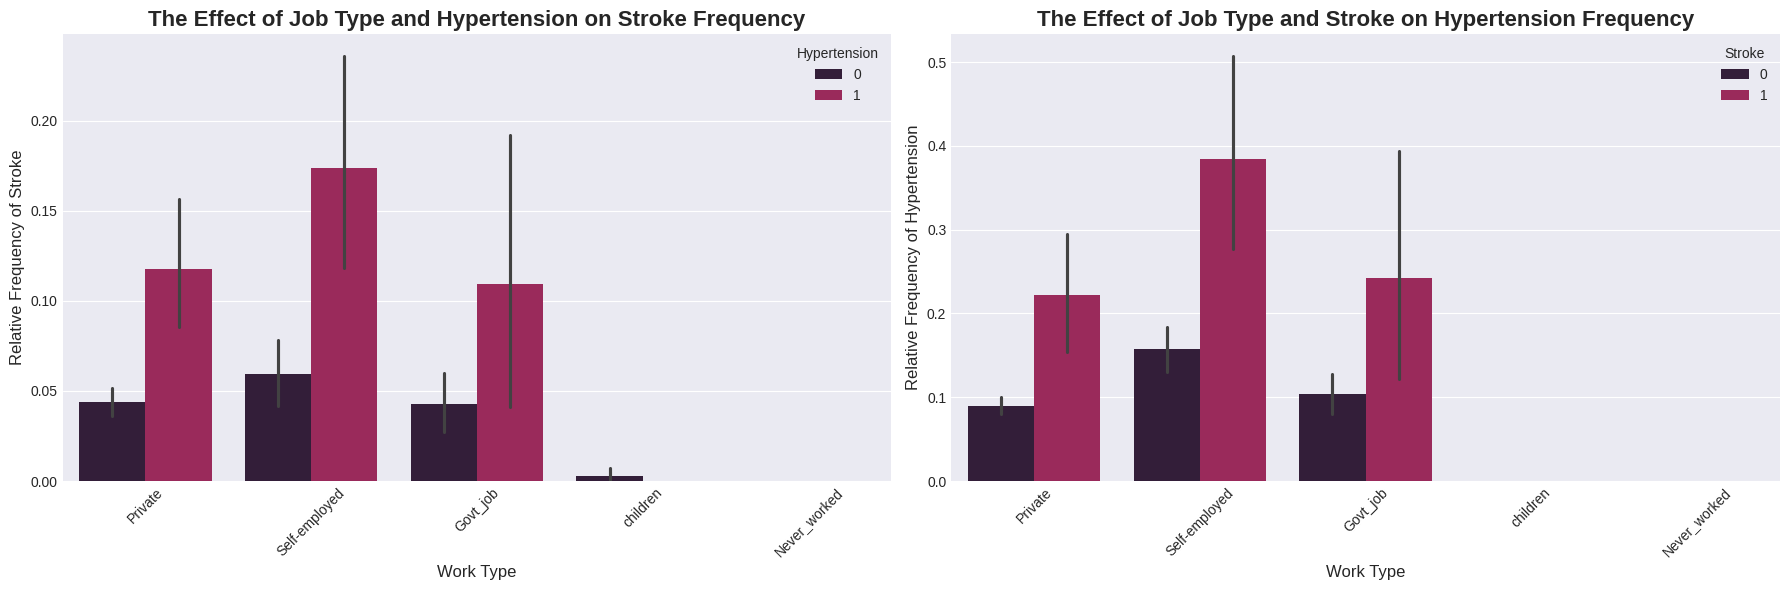

In [46]:
palette = {0: "#35193e", 1: "#ad1759"}
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x="Work_Type", y="Stroke", hue="Hypertension", data=df, palette=palette, ax=axes[0])
axes[0].set_title("The Effect of Job Type and Hypertension on Stroke Frequency", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Work Type", fontsize=12)
axes[0].set_ylabel("Relative Frequency of Stroke", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(
    x="Work_Type",
    y="Hypertension",
    hue="Stroke",
    data=df,
    palette=palette,
    ax=axes[1]
)
axes[1].set_title("The Effect of Job Type and Stroke on Hypertension Frequency", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Work Type", fontsize=12)
axes[1].set_ylabel("Relative Frequency of Hypertension", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [47]:
grouped_work_stress_male=df[df["Gender"] == "Male"].groupby(["Work_Type"])["Stroke"].mean().reset_index()
grouped_lifestyle_stress_male=df[df["Gender"] == "Male"].groupby(["Smoking_Status", "Ever_Married", "BMI"])["Stroke"].mean().reset_index()

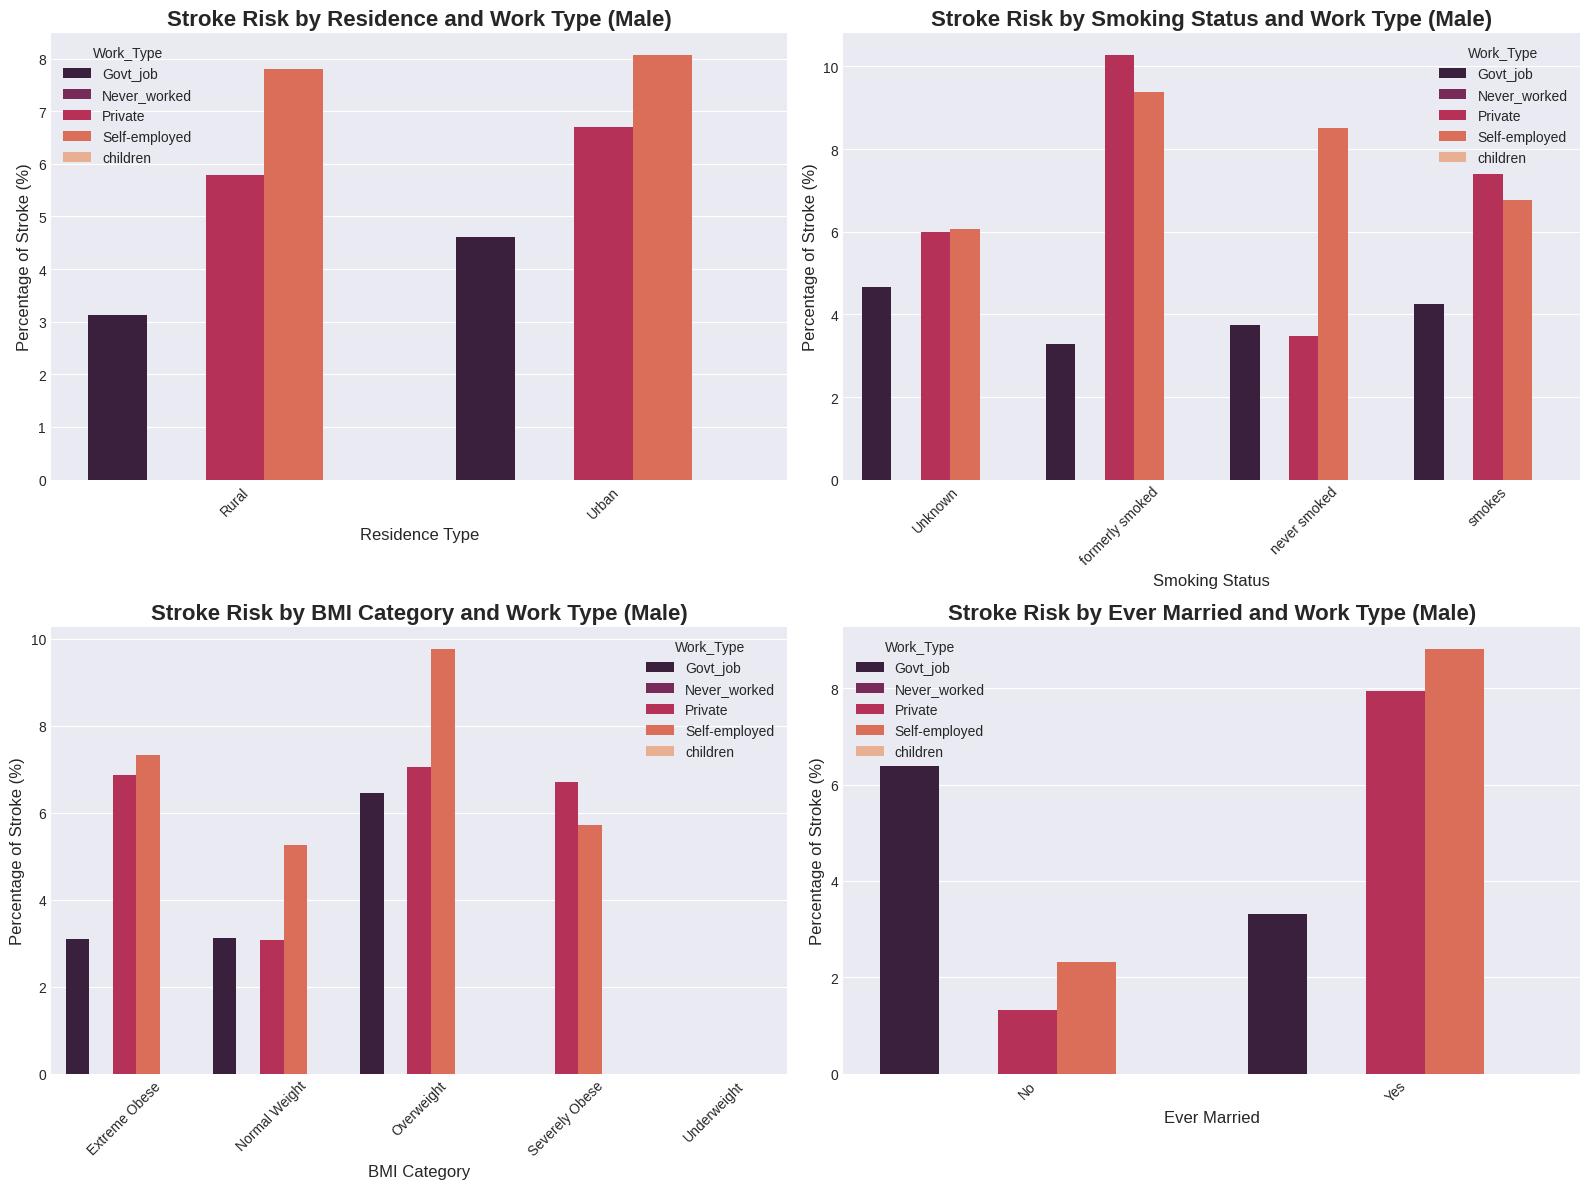

In [48]:
df_male = df[df["Gender"] == "Male"]

# Create separate grouped DataFrames for each plot
def create_grouped_data(data, group_cols):
    grouped = data.groupby(group_cols)["Stroke"].mean() * 100
    return grouped.reset_index()

# Create grouped data for each plot
residence_work = create_grouped_data(df_male, ["Residence_Type", "Work_Type"])
smoking_work = create_grouped_data(df_male, ["Smoking_Status", "Work_Type"])
bmi_work = create_grouped_data(df_male, ["BMI_Group", "Work_Type"])
married_work = create_grouped_data(df_male, ["Ever_Married", "Work_Type"])

# Create subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Residence Type and Work Type
sns.barplot(data=residence_work, 
            x="Residence_Type", 
            y="Stroke",
            hue="Work_Type",
            palette="rocket", 
            ax=axes[0, 0])

axes[0, 0].set_title("Stroke Risk by Residence and Work Type (Male)", fontsize=16, fontweight="bold")
axes[0, 0].set_xlabel("Residence Type", fontsize=12)
axes[0, 0].set_ylabel("Percentage of Stroke (%)", fontsize=12)
axes[0, 0].tick_params(axis="x", rotation=45)

# Plot 2: Smoking Status and Work Type
sns.barplot(data=smoking_work,
            x="Smoking_Status",
            y="Stroke",
            hue="Work_Type",
            palette="rocket",
            ax=axes[0, 1])

axes[0, 1].set_title("Stroke Risk by Smoking Status and Work Type (Male)", fontsize=16, fontweight="bold")
axes[0, 1].set_xlabel("Smoking Status", fontsize=12)
axes[0, 1].set_ylabel("Percentage of Stroke (%)", fontsize=12)
axes[0, 1].tick_params(axis="x", rotation=45)

# Plot 3: BMI Group and Work Type
sns.barplot(data=bmi_work,
            x="BMI_Group",
            y="Stroke",
            hue="Work_Type",
            palette="rocket",
            ax=axes[1, 0])

axes[1, 0].set_title("Stroke Risk by BMI Category and Work Type (Male)", fontsize=16, fontweight="bold")
axes[1, 0].set_xlabel("BMI Category", fontsize=12)
axes[1, 0].set_ylabel("Percentage of Stroke (%)", fontsize=12)
axes[1, 0].tick_params(axis="x", rotation=45)

# Plot 4: Marriage Status and Work Type
sns.barplot(data=married_work,
            x="Ever_Married",
            y="Stroke",
            hue="Work_Type",
            palette="rocket",
            ax=axes[1, 1])

axes[1, 1].set_title("Stroke Risk by Ever Married and Work Type (Male)", fontsize=16, fontweight="bold")
axes[1, 1].set_xlabel("Ever Married", fontsize=12)
axes[1, 1].set_ylabel("Percentage of Stroke (%)", fontsize=12)
axes[1, 1].tick_params(axis="x", rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [49]:
df["Life_Style_Risk_Factor"] = df["Ever_Married"] + "-" + df["Smoking_Status"] + "-" + df["Residence_Type"]

In [50]:
df["Life_Style_Risk_Factor"]

0       Yes-formerly smoked-Urban
1          Yes-never smoked-Rural
2          Yes-never smoked-Rural
3                Yes-smokes-Urban
4          Yes-never smoked-Rural
                  ...            
5105       Yes-never smoked-Urban
5106       Yes-never smoked-Urban
5107       Yes-never smoked-Rural
5108    Yes-formerly smoked-Rural
5109            Yes-Unknown-Urban
Name: Life_Style_Risk_Factor, Length: 5109, dtype: object

In [51]:
df_40=df[df["Age"] >= 40]
df["Composite_Variable"] = df_40["Ever_Married"] + "-" + df_40["Smoking_Status"] + "-" + df_40["Residence_Type"]

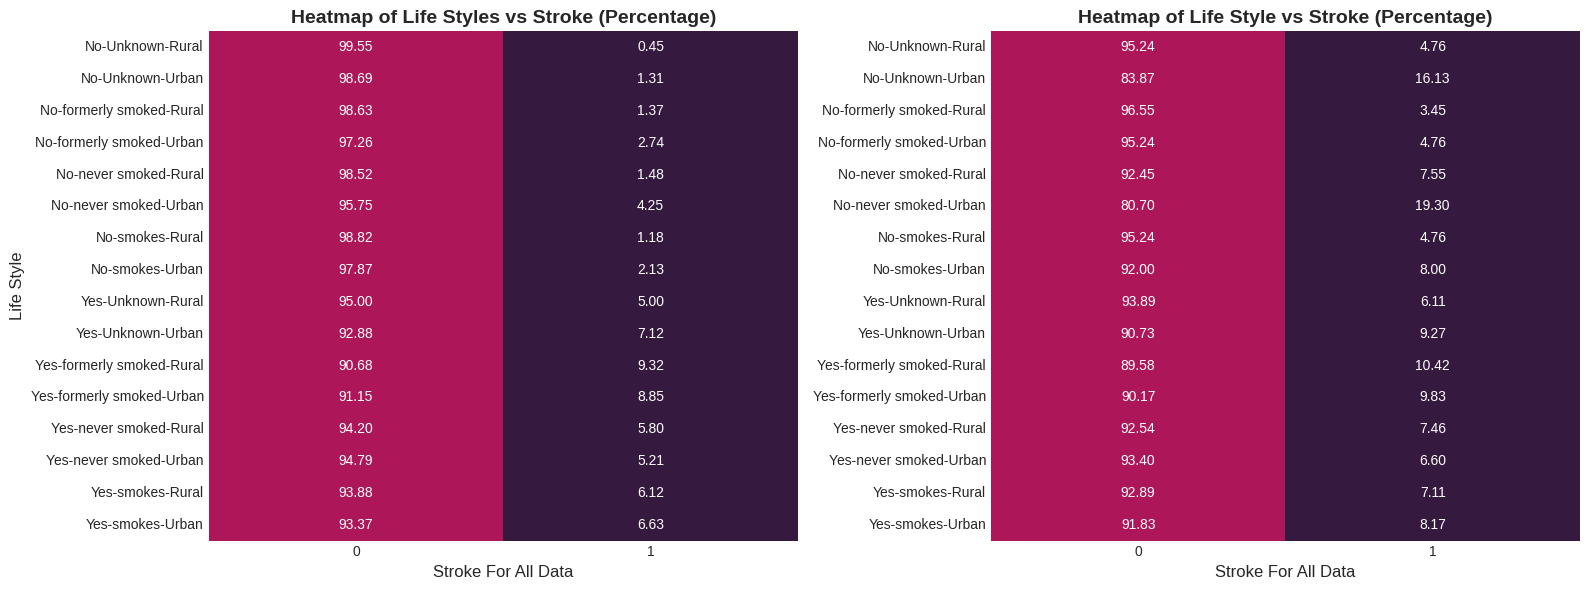

In [52]:
composit_counts_1 = pd.crosstab(df["Composite_Variable"], df["Stroke"])
composit_percent_1 = composit_counts_1.div(composit_counts_1.sum(axis=1), axis=0) * 100

composit_counts_2= pd.crosstab(df["Life_Style_Risk_Factor"], df["Stroke"])
composit_percent_2 = composit_counts_2.div(composit_counts_2.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(composit_percent_1, annot=True, fmt=".2f", cmap=dark_purple_rose_red_cmap, cbar=False, ax=axes[1])
axes[1].set_title("Heatmap of Life Style vs Stroke (Percentage)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Stroke For All Data", fontsize=12)
axes[1].set_ylabel("", fontsize=12)

sns.heatmap(composit_percent_2, annot=True, fmt=".2f", cmap=dark_purple_rose_red_cmap, cbar=False, ax=axes[0])
axes[0].set_title("Heatmap of Life Styles vs Stroke (Percentage)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Stroke For All Data", fontsize=12)
axes[0].set_ylabel("Life Style", fontsize=12)

plt.tight_layout()
plt.show()

In [53]:
composit_percent_1[1] / composit_percent_2[1]

Composite_Variable
No-Unknown-Rural             10.523810
No-Unknown-Urban             12.338710
No-formerly smoked-Rural      2.517241
No-formerly smoked-Urban      1.738095
No-never smoked-Rural         5.113208
No-never smoked-Urban         4.543860
No-smokes-Rural               4.047619
No-smokes-Urban               3.760000
Yes-Unknown-Rural             1.221374
Yes-Unknown-Urban             1.302419
Yes-formerly smoked-Rural     1.118152
Yes-formerly smoked-Urban     1.109827
Yes-never smoked-Rural        1.287313
Yes-never smoked-Urban        1.267573
Yes-smokes-Rural              1.162531
Yes-smokes-Urban              1.233109
Name: 1, dtype: float64

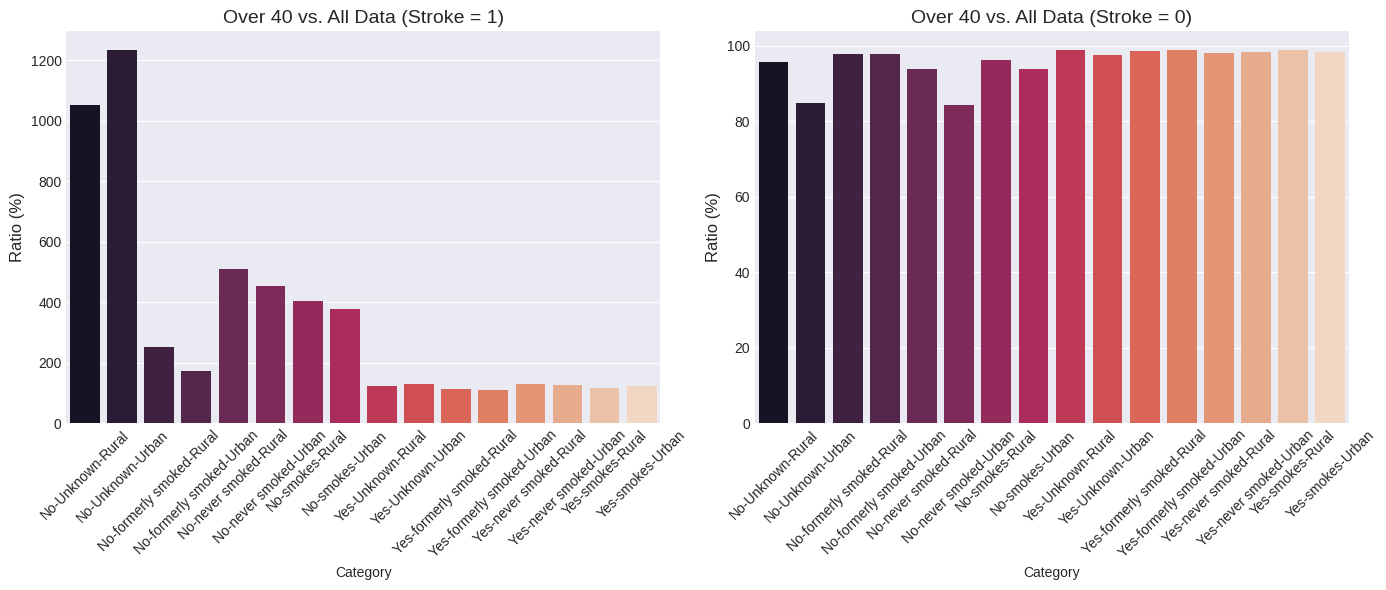

In [54]:
ratio_percent_1 = (composit_percent_1[1] / composit_percent_2[1]) * 100
ratio_percent_2 = (composit_percent_1[0] / composit_percent_2[0]) * 100

ratio_df_1 = pd.DataFrame({
    "Category": composit_percent_1.index,  
    "Ratio (%)": ratio_percent_1
}).reset_index(drop=True)

ratio_df_2 = pd.DataFrame({
    "Category": composit_percent_1.index,  
    "Ratio (%)": ratio_percent_2
}).reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=ratio_df_1, x="Category", y="Ratio (%)", palette="rocket", ax=axes[0])
axes[0].set_title("Over 40 vs. All Data (Stroke = 1)", fontsize=14)
axes[0].set_xlabel("Category", fontsize=10)
axes[0].set_ylabel("Ratio (%)", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(data=ratio_df_2, x="Category", y="Ratio (%)", palette="rocket", ax=axes[1])
axes[1].set_title("Over 40 vs. All Data (Stroke = 0)", fontsize=14)
axes[1].set_xlabel("Category", fontsize=10)
axes[1].set_ylabel("Ratio (%)", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [55]:
new_df = df.copy()

In [56]:
new_df["Hypertension"] = new_df["Hypertension"].replace({0: "No", 1: "Yes"})
new_df["Heart_Disease"] = new_df["Heart_Disease"].replace({0: "No", 1: "Yes"})

In [57]:
new_df["Health_Risk_Factors"] = new_df["Hypertension"] + "-" + new_df["Heart_Disease"] + "-" + new_df["BMI_Group"]

In [58]:
composit_counts2 = pd.crosstab(new_df["Health_Risk_Factors"], new_df["Stroke"])

In [59]:
composit_percent2 = composit_counts2.div(composit_counts2.sum(axis=1), axis=0) * 100

In [60]:
custom_colors = ["#35193e", "#ad1759"]

# Verileri uzun formata dönüştür
composit_percent2_long = composit_percent2.reset_index().melt(
    id_vars="Health_Risk_Factors", 
    var_name="Stroke", 
    value_name="Percentage"
)

# Alt grafikler için figür oluştur
fig = make_subplots(
    rows=2, cols=1, 
    subplot_titles=(
        "Health Risk Factors vs Stroke Distribution",
        "Stroke Risk Analysis by Health Factors"
    ),
    vertical_spacing=0.3,  # Grafiler arası boşluğu artır
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]]  # İkincil y ekseni ekle
)

# 1. Bar grafiği oluştur
bar_fig = px.bar(
    composit_percent2_long, 
    x="Health_Risk_Factors", 
    y="Percentage", 
    color="Stroke", 
    barmode="group", 
    text="Percentage",
    labels={"Health_Risk_Factors": "Health Risk Factors", "Percentage": "Percentage (%)"},
    color_discrete_sequence=custom_colors
)

# Bar grafiği trace"lerini ekle
for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Bar grafiği metin ve düzen ayarları
fig.update_traces(
    texttemplate="%{y:.1f}%", 
    textposition="outside",
    textfont=dict(size=10),
    row=1, col=1
)

# 2. Scatter plot oluştur
scatter_fig = px.scatter(
    composit_percent2_long, 
    x="Health_Risk_Factors", 
    y="Stroke", 
    size="Percentage", 
    color="Health_Risk_Factors",
    labels={"Health_Risk_Factors": "Health Risk Factors", "Stroke": "Stroke"},
    color_discrete_sequence=custom_colors
)

# Scatter plot trace"lerini ekle
for trace in scatter_fig.data:
    fig.add_trace(trace, row=2, col=1)

# Genel düzen ayarları
fig.update_layout(
    height=1000,
    title={
        "text": "Health Risk Factors and Stroke Analysis",
        "y": 0.95,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font": dict(size=24)
    },
    template="plotly_white",
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.45,  # İlk grafiğin altına yerleştir
        xanchor="left",
        x=1.05,  # Grafiğin sağına yerleştir
        title="Stroke Status",
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="lightgray",
        borderwidth=1
    )
)

# Alt grafiklere özel ayarlar
fig.update_xaxes(
    title_text="Health Risk Factors",
    row=1,
    col=1,
    tickangle=45,
    gridcolor="lightgray"
)

fig.update_yaxes(
    title_text="Percentage (%)",
    row=1,
    col=1,
    gridcolor="lightgray"
)

fig.update_xaxes(
    title_text="Health Risk Factors",
    row=2,
    col=1,
    tickangle=45,
    gridcolor="lightgray"
)

fig.update_yaxes(
    title_text="Stroke",
    row=2,
    col=1,
    gridcolor="lightgray"
)

# Grafik kenar boşluklarını ayarla ve sağ tarafta legend için yer aç
fig.update_layout(
    margin=dict(t=150, b=100, l=100, r=200)  # Sağ margin"i artır
)

fig.show(renderer="iframe_connected")

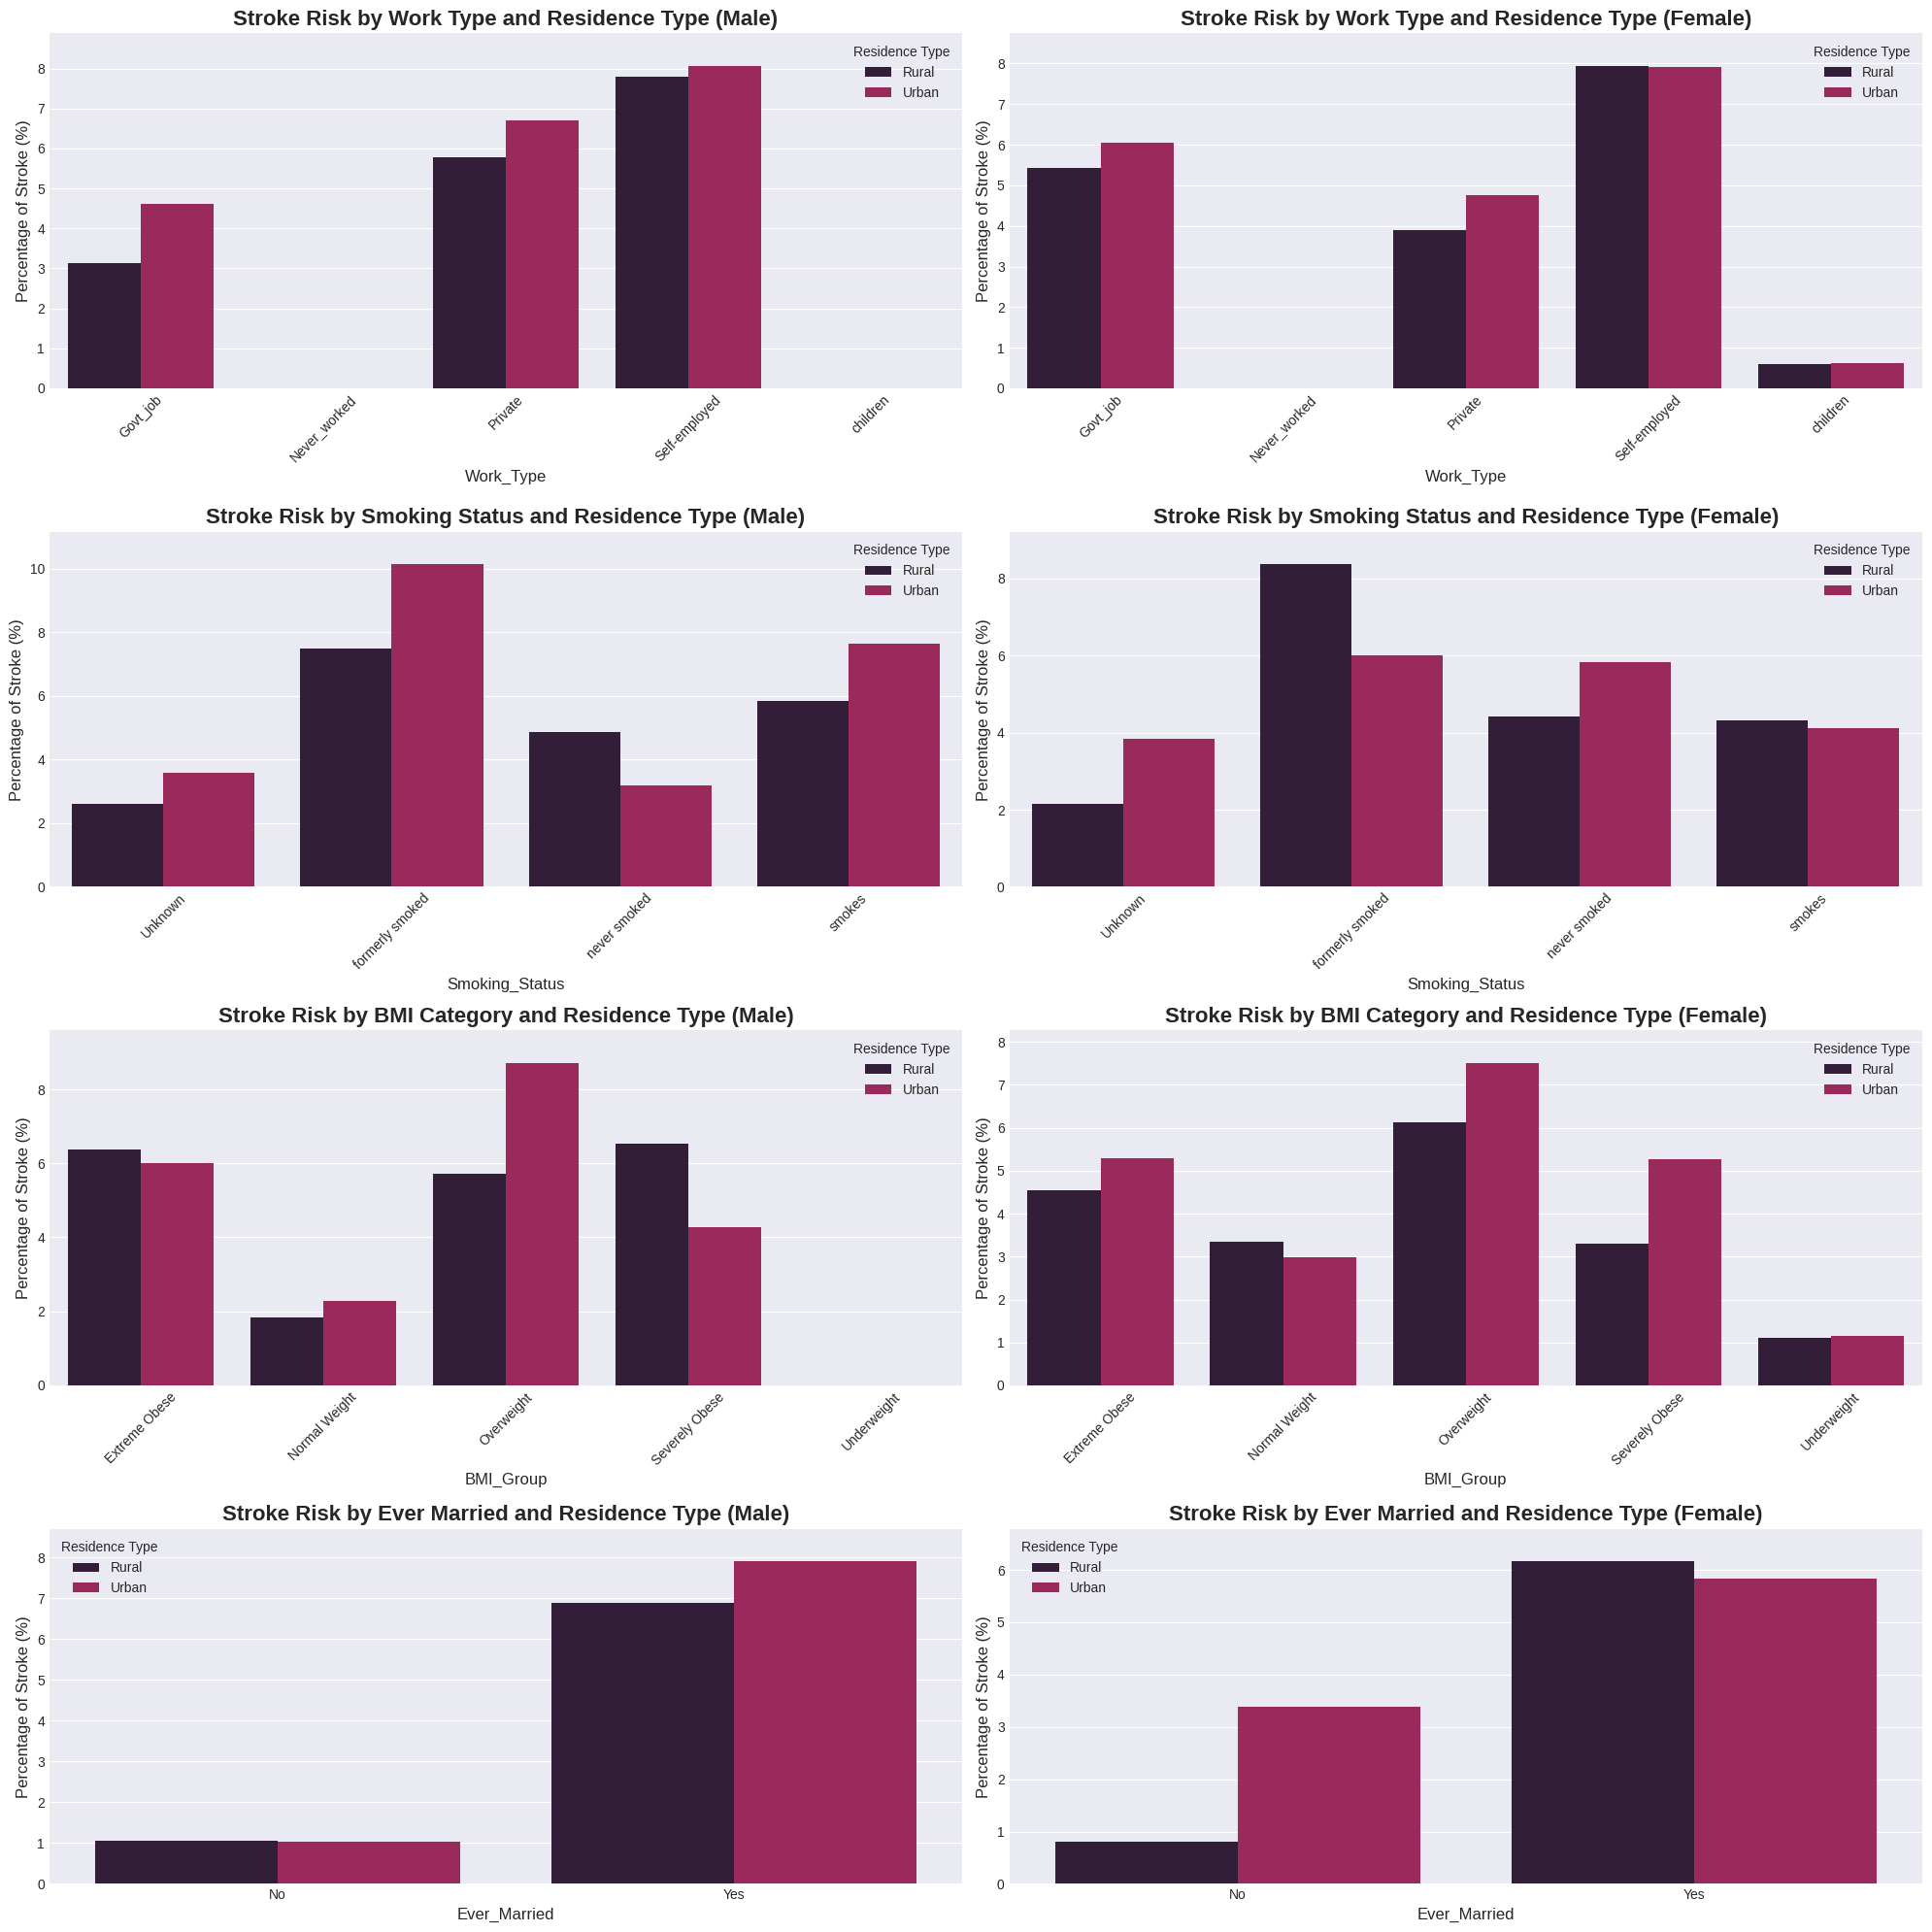

In [61]:
def create_grouped_data(data, category, gender):
    df_filtered = data[data["Gender"] == gender]
    grouped = df_filtered.groupby([category, "Residence_Type"])["Stroke"].mean() * 100
    return grouped.reset_index()

fig, axes = plt.subplots(4, 2,  figsize=(20, 20))

categories = ["Work_Type", "Smoking_Status", "BMI_Group", "Ever_Married"]
genders = ["Male", "Female"]
row_titles = [
    "Work Type and Residence Type",
    "Smoking Status and Residence Type",
    "BMI Category and Residence Type",
    "Ever Married and Residence Type"
]

for i, gender in enumerate(genders):
    for j, (category, title) in enumerate(zip(categories, row_titles)):
        plot_data = create_grouped_data(df, category, gender)

        sns.barplot(data=plot_data,
                    x=category,
                    y="Stroke",
                    hue="Residence_Type",
                    palette=["#35193e", "#ad1759"],
                    ax=axes[j, i])

        axes[j, i].set_title(f"Stroke Risk by {title} ({gender})",
                             fontsize=16,
                             fontweight="bold")
        axes[j, i].set_xlabel(category.replace("-", " "),
                              fontsize=12)
        axes[j, i].set_ylabel("Percentage of Stroke (%)",
                              fontsize=12)
        axes[j, i].legend(title="Residence Type")

        if category in ["Work_Type", "Smoking_Status", "BMI_Group"]:
            axes[j, i].tick_params(axis="x", rotation=45)

        axes[j, i].set_ylim(0, plot_data["Stroke"].max() * 1.1)

plt.tight_layout()
plt.show()

In [62]:
df_60 = df.copy()

In [63]:
def create_stroke_heatmaps(filtered_data, df_original, age_groups=["young", "middle", "elderly"]):
    """
    Her yaş grubu için stroke oranlarını gösteren heatmap"ler oluşturur.
    
    Args:
        filtered_data: Yaş gruplarına göre filtrelenmiş veriler (dictionary)
        df_original: Orijinal DataFrame
        age_groups: Analiz edilecek yaş grupları
    """
    # Grafik alanını oluştur
    fig, axes = plt.subplots(1, len(age_groups), figsize=(20, 6))
    
    # Her yaş grubu için heatmap oluştur
    for idx, group in enumerate(age_groups):
        # Crosstab ve yüzde hesaplama
        counts = pd.crosstab(filtered_data[group][f"Composite_Variable_{group}"], 
                           df_original["Stroke"])
        percentages = counts.div(counts.sum(axis=1), axis=0) * 100
        
        # Heatmap çizimi
        sns.heatmap(percentages, 
                   annot=True, 
                   fmt=".1f", 
                   cmap=dark_purple_rose_red_cmap, 
                   cbar=False, 
                   ax=axes[idx])
        
        # Grafik başlıkları ve etiketleri
        axes[idx].set_title(f'Stroke Risk Analysis: {group.replace("-", " ").title()} Age Group')
        axes[idx].set_xlabel("Stroke")
        axes[idx].set_ylabel("Composite Variables\n(Married_Smoking_Residence)")
        
        # Y eksen etiketlerini daha okunabilir yap
        axes[idx].tick_params(axis="y", labelsize=8)
    
    # Grafiklerin düzenlenmesi
    plt.tight_layout()
    return fig

# Kullanım örneği:
def analyze_stroke_risk(df_60):
    # Önce verileri filtrele
    filtered_data = filter_by_age_group(df_60)
    
    # Heatmap"leri oluştur
    fig = create_stroke_heatmaps(filtered_data, df_60)
    
    # Grafiği göster
    plt.show()
    
    return filtered_data

# Analizi çalıştır
filtered_results = analyze_stroke_risk(df_60)

NameError: name 'filter_by_age_group' is not defined

In [ ]:
residence_stroke_data = df.groupby("Ever_Married")["Stroke"].count().reset_index()

plt.figure(figsize=(8, 6))
custom_palette = ["#35193e", "#ad1759"]

sns.barplot(
    data=residence_stroke_data,
    x="Ever_Married",
    y="Stroke",
    palette=custom_palette
)

plt.title("Stroke Rates by Ever Married", fontsize=16, fontweight="bold")
plt.xlabel("Ever Married", fontsize=14)
plt.ylabel("Stroke Count", fontsize=14)

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

In [ ]:
under_20 = df[df["Age"] < 20]
between_20_40 = df[(df["Age"] >= 20) & (df["Age"] <= 40)]
over_40 = df[df["Age"] > 40]

age_groups = {
    "Under 20 years old": under_20,
    "Between 20-40 years old": between_20_40,
    "Over 40 years old": over_40
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

custom_palette = ["#35193e", "#ad1759"]

for idx, (group_name, group_data) in enumerate(age_groups.items()):
    ever_married_value = group_data["Ever_Married"].value_counts()
    countplot = sns.countplot(data=group_data, 
                              x="Ever_Married", 
                              palette=custom_palette, 
                              ax=axes[idx][0], 
                              hue="Stroke")
    axes[idx][0].set_title(f"{group_name} - Stroke Status According to Marriage Status", fontsize=14, fontweight="bold")
    axes[idx][0].set_xlabel("Married Status", fontsize=12)
    axes[idx][0].set_ylabel("Frequency", fontsize=12)

    total = len(group_data)
    for p in countplot.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        countplot.text(p.get_x() + p.get_width() / 2, height + 1, f"{percentage:.1f}%", ha="center", fontsize=10)

    wedges, texts, autotexts = axes[idx][1].pie(
        ever_married_value, 
        labels=ever_married_value.index, 
        colors=custom_palette, 
        autopct="%1.1f%%", 
        startangle=90, 
        wedgeprops={"edgecolor": "black", "linewidth": 1.5}
    )
    axes[idx][1].set_title(f"{group_name} - Distribution of Marriage Status", fontsize=14, fontweight="bold")
    
    for text in texts:
        text.set_color("black")  
    for autotext in autotexts:
        autotext.set_color("white")  
        autotext.set_fontweight("bold") 

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

custom_palette = ["#35193e", "#ad1759"]

ax = sns.countplot(x="Residence_Type", hue="Stroke", data=df, palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()

    ax.text(x + width / 2, height + 0.05, f"{int(height)}", ha="center", va="bottom", fontsize=12, color="black")

    plt.title("Stroke Count by Residence Type", fontsize=16, fontweight="bold")
    plt.xlabel("Residence Type", fontsize=14)
    plt.ylabel("Count", fontsize=14)

    plt.show()

In [ ]:
stroke_home = df[df["Stroke"] == 1]["Residence_Type"].value_counts()
healthy_home = df[df["Stroke"] == 0]["Residence_Type"].value_counts()
urban = df["Residence_Type"].value_counts().values[0]
rural = df["Residence_Type"].value_counts().values[1]
stroke_urban=int(round(stroke_home.values[0] / urban * 100, 0))
stroke_rural=int(round(stroke_home.values[1] / rural * 100, 0))
healthy_urban=int(round(healthy_home.values[0] / urban * 100, 0))
healthy_rural=int(round(healthy_home.values[1] / rural * 100, 0))
urban_per=int(round(urban / (urban + rural) * 100, 0))
rural_per=int(round(rural / (urban + rural) * 100, 0))

fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
ax.set_facecolor("#f6f5f5")
fig.patch.set_facecolor("#f6f5f5")

ncols = 7
nrows = 7

urban_values = [stroke_urban, healthy_urban]
rural_values = [stroke_rural, healthy_rural]
colors = ["#fe346e", "#512b58"]

def plot_waffle_section(values, colors, start_x, ax, title):
    for i in range(values[0]):  # Stroke cases
        row = i // ncols
        col = i % ncols
        ax.add_patch(patches.Rectangle(
            (col * 0.14 + start_x, 0.72 - row * 0.14),
            0.14, 0.14,
            facecolor=colors[0],
            alpha=0.8,
            edgecolor="white"
        ))
    
    for i in range(values[1]):  # Healthy cases
        row = (values[0] + i) // ncols
        col = (values[0] + i) % ncols
        ax.add_patch(patches.Rectangle(
            (col * 0.14 + start_x, 0.72 - row * 0.14),
            0.14, 0.14,
            facecolor=colors[1],
            alpha=0.8,
            edgecolor="white"
        ))
    
    # Add title
    ax.text(start_x + 0.5, 1.0, title, 
            ha="center", va="bottom", 
            fontsize=12, fontweight="bold")
    
    # Add percentage labels
    ax.text(start_x + 0.5, -0.3, 
            f"Stroke: {values[0]}%\nHealthy: {values[1]}%",
            ha="center", va="top",
            fontsize=10)

# Plot both sections
plot_waffle_section(urban_values, colors, 0, ax, "Urban")
plot_waffle_section(rural_values, colors, 1.2, ax, "Rural")

# Add legend
legend_elements = [
    patches.Patch(facecolor=colors[0], alpha=0.8, label="Stroke Cases"),
    patches.Patch(facecolor=colors[1], alpha=0.8, label="Healthy Cases")
]
ax.legend(handles=legend_elements, loc="upper center", 
         bbox_to_anchor=(0.85, -0.15),
         ncol=2, frameon=False)

# Set limits and hide axes
ax.set_xlim(-0.1, 2.3)
ax.set_ylim(-0.2, 1.1)
ax.axis("off")

# Add title
plt.suptitle("Stroke Distribution by Residence Type", 
             y=1.05, fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.violinplot(y="BMI", hue="Stroke", data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title("BMI Distribution by Stroke")

plt.subplot(1, 3, 2)
sns.violinplot(y="Avg_Glucose_Level", hue="Stroke", data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title("Glucose Level Distribution by Stroke")

plt.subplot(1, 3, 3)
sns.violinplot(y="Age", hue="Stroke", data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title("Age Distribution by Stroke")

# Düzeni sıkıştırarak grafiklerin daha net görünmesini sağla
plt.tight_layout()
plt.show()

In [ ]:
custom_palette = ["#35193e", "#ad1759"]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y="BMI", hue="Heart_Disease", data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title("BMI Distribution by Heart Disease", fontsize=14, fontweight="bold")
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("BMI", fontsize=12)

plt.subplot(1, 3, 2)
sns.boxplot(y="Avg_Glucose_Level", hue="Heart_Disease", data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title("Glucose Level Distribution by Heart Disease", fontsize=14, fontweight="bold")
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Avg Glucose Level", fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(y="Age", hue="Heart_Disease", data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title("Age Distribution by Heart Disease", fontsize=14, fontweight="bold")
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Age", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame, make sure it"s properly defined and imported before this code.

fig = plt.figure(figsize=(12,6), dpi=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

fig.patch.set_facecolor("#f6f5f5")
ax0.set_facecolor("#f6f5f5")
ax1.set_facecolor("#f6f5f5")

# Assuming "Stroke", "gender", and "glucose_cat" are columns in your DataFrame `df`
healthy = df[df["Stroke"] == 0]
stroke = df[df["Stroke"] == 1]

gender_order = ["Female", "Male"]
glucose_order = ["Low", "Normal", "High", "Very High"]

col1 = ["#4b4b4c", "#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke["Gender"], [stroke["Glucose_Level_Group"]], normalize="index").loc[gender_order, glucose_order]
no_stroke = pd.crosstab(healthy["Gender"], [healthy["Glucose_Level_Group"]], normalize="index").loc[gender_order, glucose_order]

sns.heatmap(ax=ax0, data=stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col1, annot=True, fmt="1.0%", annot_kws={"fontsize":14}, alpha=0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col2, annot=True, fmt="1.0%", annot_kws={"fontsize":14}, alpha=0.9)

ax0.text(0, -1., "Distribution of Strokes with Gender & Glucose level", {"font": "Serif", "color": "black", "weight": "bold", "size": 25})
ax0.text(0, -0.75, "Clearly, irrespective of gender, elderly men and women are prone to heart strokes.", {"font": "Serif", "color": "black", "size": 14}, alpha=0.7)

ax0.text(0, -0.1, "Stroke Percentage", {"font": "serif", "color": "#fe346e", "size": 20}, alpha=0.9)
ax1.text(0, -0.1, "No Stroke Percentage", {"font": "serif", "color": "#512b58", "size": 20}, alpha=0.9)

#ax0.axes.set_xticklabels(glucose_order, {"font": "serif", "color": "black", "size": 12})
#ax1.axes.set_xticklabels(glucose_order, {"font": "serif", "color": "black", "size": 12})

#ax0.axes.set_yticklabels(gender_order, {"font": "serif", "color": "black", "size": 16}, rotation=0)

ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.axes.get_yaxis().set_visible(False)

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor("#f6f5f5")
ax0.set_facecolor("#f6f5f5")
ax1.set_facecolor("#f6f5f5")

healthy = df[df["Stroke"]==0]
stroke = df[df["Stroke"]==1]


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke["Hypertension"],[stroke["Heart_Disease"]],normalize="index")
no_stroke = pd.crosstab(healthy["Hypertension"],[healthy["Heart_Disease"]], normalize="index")

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt="1.0%",annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt="1.0%",annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, "Distribution of Strokes with Hypertension & Heart disease", {"font":"Serif", "color":"black", "weight":"bold","size":25})

ax0.text(0,-0.1,"Storke Pecentage ", {"font":"serif", "color":"#fe346e", "size":20},alpha = 0.9)
ax1.text(0,-0.1,"No Stroke Percentage", {"font":"serif", "color":"#512b58", "size":20}, alpha =0.9)

ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.axes.get_yaxis().set_visible(False)
fig.show()
